# Honey Production In The USA (1998-2012)


#### Data Fields

   * state
   * numcol : number of honey producing colonies
   * yieldpercol : yield per colony (lbs)
   * totalprod : total production (lbs: numcol * yieldpercol)
   * stocks : stocks held by producers (lbs)
   * priceperlb : avg price per lb 
   * prodvalue : totalprod * priceperlb
   * year 
   
#### My natural fascination with bees led me to explore this dataset. SAVE THE BEES!

#### Import Data

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
honey = pd.read_csv('../input/honeyproduction.csv')

In [113]:
honey.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [114]:
print(honey['state'].unique())
print('\n')
print("Number of States in dataset: " + str(len(honey['state'].unique())))

['AL' 'AZ' 'AR' 'CA' 'CO' 'FL' 'GA' 'HI' 'ID' 'IL' 'IN' 'IA' 'KS' 'KY' 'LA'
 'ME' 'MD' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH'
 'OK' 'OR' 'PA' 'SD' 'TN' 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'SC']


Number of States in dataset: 44


#### Visualize Change in Honey Pricings

Text(0.5,1,'$ Price per lb.')

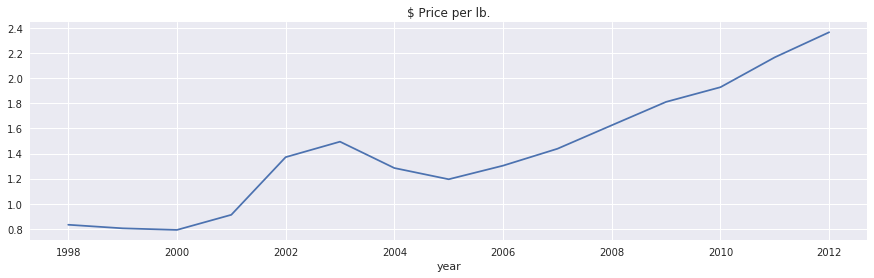

In [115]:
sns.set_style("darkgrid")
honey.groupby('year')['priceperlb'].mean().plot(figsize=(15,4)).set_title('$ Price per lb.')

#### Visualize the Supply & Demand of Honey

Text(0.5,1,'Total Production (lbs) vs. Production Value ($)')

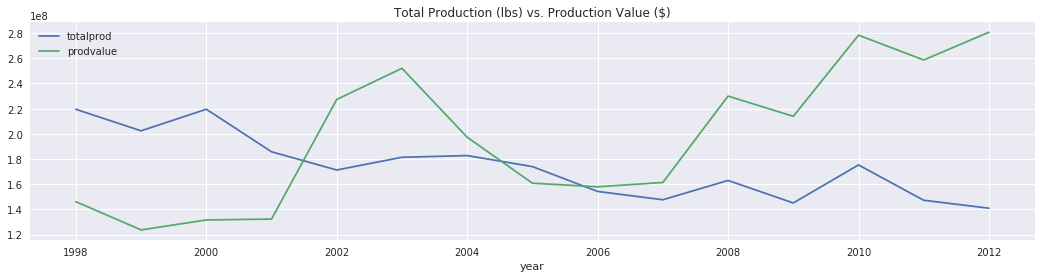

In [116]:
honey.groupby('year')[['totalprod', 'prodvalue']].sum().plot(figsize=(18,4)).set_title("Total Production (lbs) vs. Production Value ($)")

#### Correlation between  Production of Honey and Price of Honey

In [117]:
honey_cor = honey[['totalprod','priceperlb']]
honey_cor.corr()

,totalprod,priceperlb
totalprod,1.000000,-0.264499
priceperlb,-0.264499,1.000000


### Total Production per State (years: 1989 - 2012)

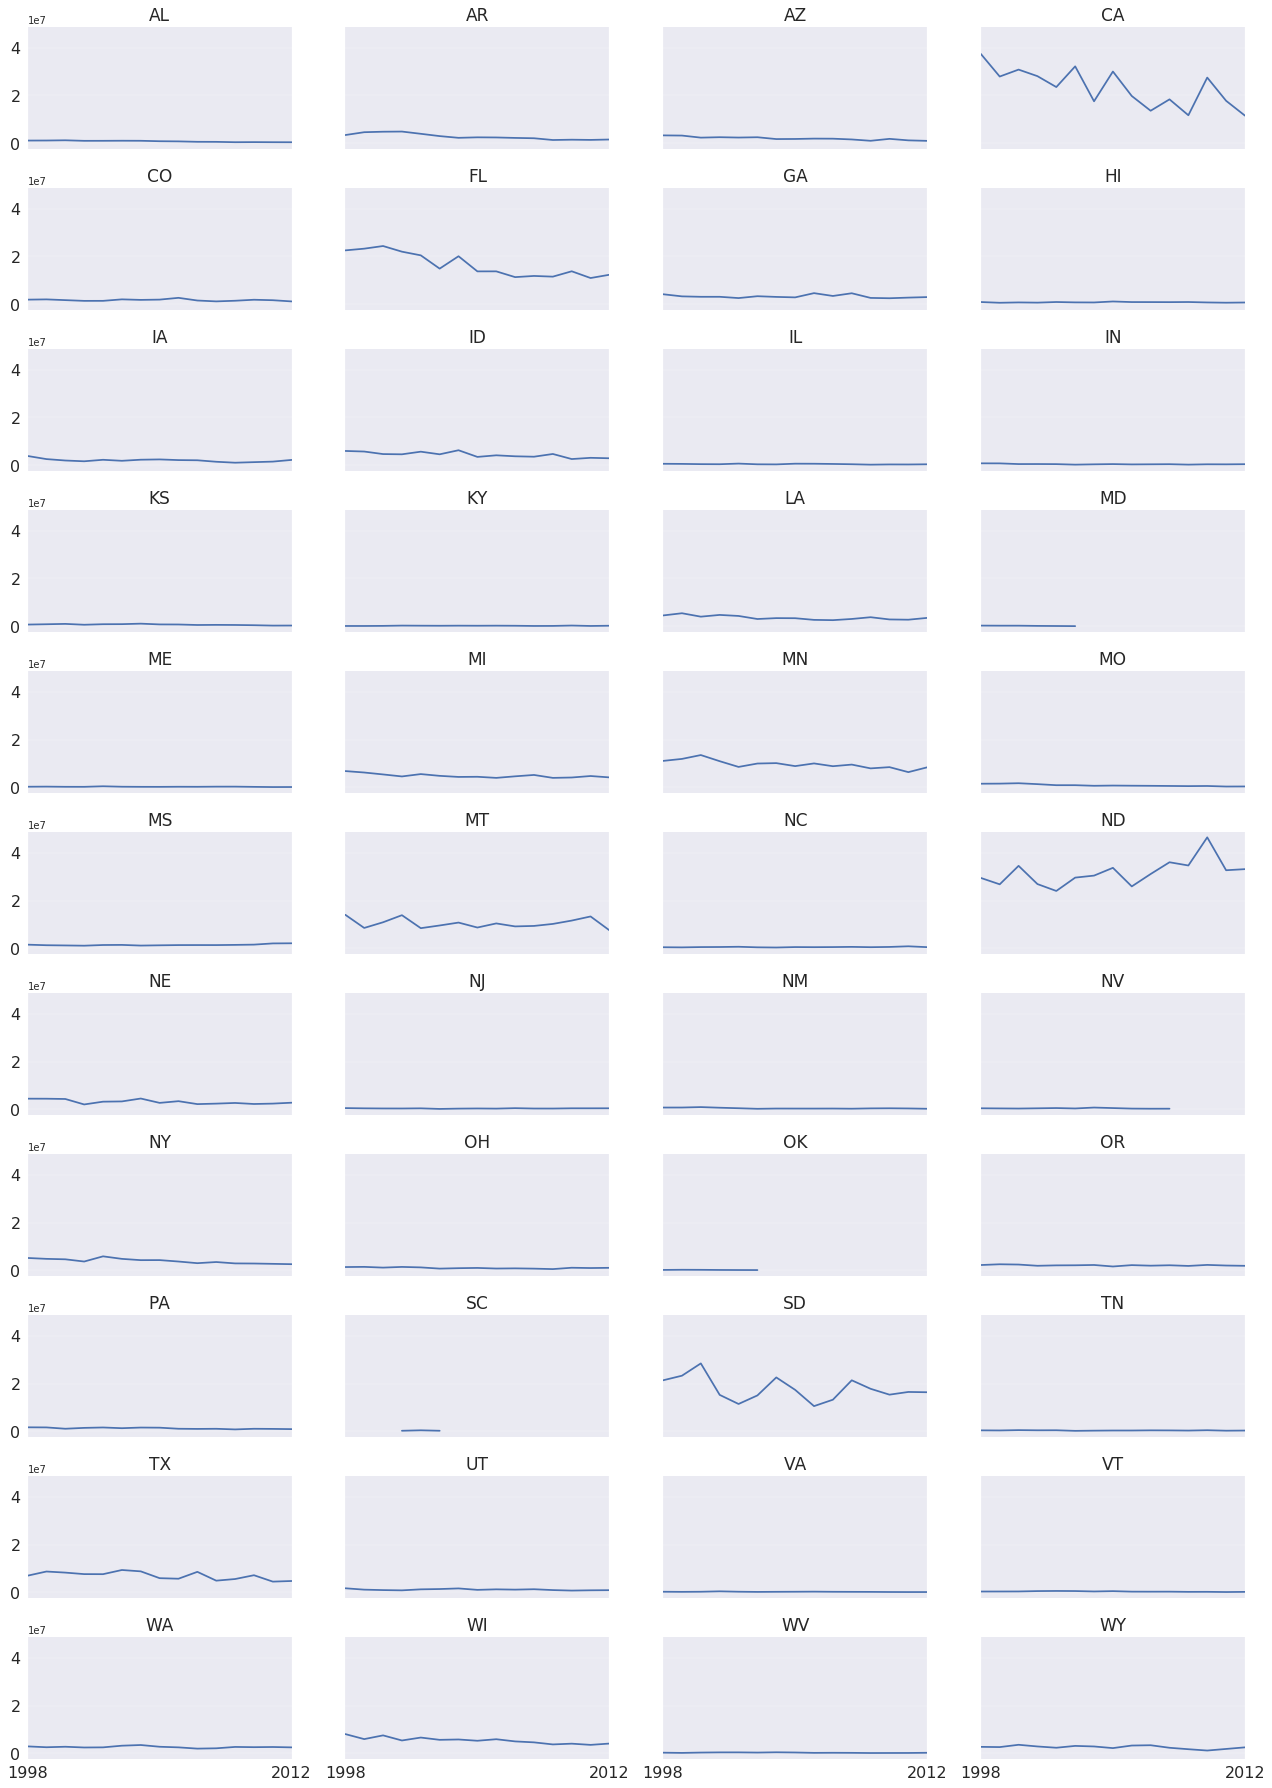

In [118]:
group= honey.groupby('state')
first_year = honey['year'].min()
last_year= honey['year'].max()

ordered_names = sorted(group['totalprod'].sum().sort_values().index)


fig, axes = plt.subplots(nrows=11, ncols=4, sharex=True, sharey=True, figsize=(18,25))
axes_list = [item for sublist in axes for item in sublist] 

for state in ordered_names:
    selection= group.get_group(state) 
    ax = axes_list.pop(0)
    selection.plot(x='year', y='totalprod', label=state, ax=ax, legend=False)
    ax.set_title(state, fontsize=17)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off',
        labelsize=16 
    )
    ax.grid(linewidth=0.25)
    ax.set_xlim((first_year, last_year))
    ax.set_xlabel("")
    ax.set_xticks((first_year, last_year))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
for ax in axes_list:
    ax.remove()
    
plt.subplots_adjust(hspace=1)
plt.tight_layout()

#### Total Production missing for States: 
* MD
* NV
* OK
* SC


In [119]:
pd.pivot_table(honey, index='state', columns='year', values='totalprod', aggfunc=np.sum)

year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
state,,,,,,,,,,,,,,,
AL,1136000.0,1156000.0,1248000.0,1022000.0,1032000.0,1066000.0,1044000.0,858000.0,792000.0,616000.0,594000.0,450000.0,486000.0,450000.0,432000.0
AR,3445000.0,4628000.0,4836000.0,4900000.0,3960000.0,3000000.0,2280000.0,2484000.0,2432000.0,2240000.0,2100000.0,1368000.0,1500000.0,1408000.0,1575000.0
AZ,3300000.0,3224000.0,2360000.0,2537000.0,2394000.0,2520000.0,1760000.0,1800000.0,1950000.0,1920000.0,1600000.0,1040000.0,1848000.0,1219000.0,1012000.0
CA,37350000.0,27900000.0,30800000.0,28060000.0,23500000.0,32160000.0,17550000.0,30000000.0,19760000.0,13600000.0,18360000.0,11715000.0,27470000.0,17760000.0,11550000.0
CO,1944000.0,2052000.0,1740000.0,1430000.0,1440000.0,2064000.0,1840000.0,1960000.0,2700000.0,1581000.0,1215000.0,1484000.0,1904000.0,1705000.0,1200000.0
FL,22540000.0,23256000.0,24360000.0,22000000.0,20460000.0,14910000.0,20090000.0,13760000.0,13770000.0,11360000.0,11850000.0,11560000.0,13800000.0,10980000.0,12352000.0
GA,4200000.0,3315000.0,3135000.0,3135000.0,2600000.0,3380000.0,3087000.0,2891000.0,4662000.0,3480000.0,4615000.0,2665000.0,2530000.0,2795000.0,3009000.0
HI,944000.0,640000.0,784000.0,696000.0,952000.0,798000.0,768000.0,1179000.0,930000.0,920000.0,900000.0,950000.0,770000.0,666000.0,750000.0
IA,3900000.0,2600000.0,2010000.0,1683000.0,2310000.0,1888000.0,2345000.0,2464000.0,2184000.0,2106000.0,1488000.0,1092000.0,1323000.0,1550000.0,2257000.0


#### Visualizing Average Yield per Colony 

* Yield per Colony is down (21.4%) in 2012 compared to 1998

Text(0.5,1,'Yield Per Colony (lbs)')

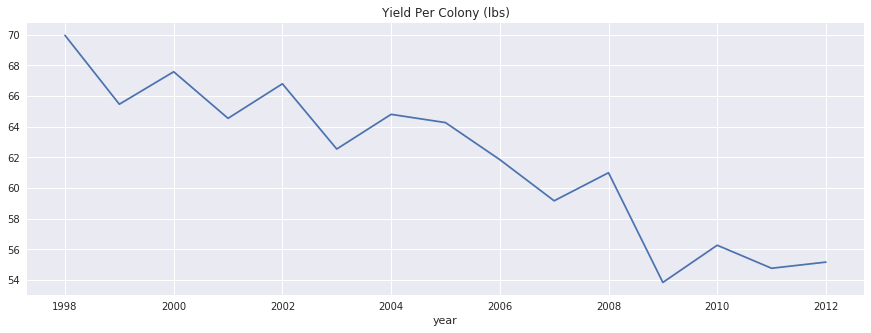

In [120]:
honey.groupby('year')['yieldpercol'].mean().plot(figsize=(15,5)).set_title("Yield Per Colony (lbs)")